# healthy_HCL_MCA_2_py_Marker

+ 根据从HCL和MCA上抓取的Marker和由Seurat定义的cluster手动进行注释
    + 将cluster和细胞类型的对应关系存储在`cache/healthy/Seurat_HCL_MCA/Map_Seurat_cluster_CL.json`
    + \[Optional\]更新CL

更新时间2024年4月09日


In [1]:
import sys
from pathlib import Path
p_root = Path('~/link/res_publish').expanduser()
None if str(p_root) in sys.path else sys.path.append(str(p_root))

In [2]:
from collections.abc import Iterable
from func import *
p_seurat_out = p_cache.joinpath('healthy/Seurat_HCL_MCA')
p_Markers = p_seurat_out.joinpath('Marker_from_HCL_MCA')
help()


def update_CL_get_df_obs_and_adata(row):

    df_obs = pd.read_csv(row['obs'], index_col=0) .join(
        pd.read_csv(row['singler_path'], index_col=0)
        .rename(columns={'labels': 'singler_label'})
        .loc[:, ['singler_label']]
    )
    df_obs['seurat_clusters'] = df_obs['seurat_clusters'].astype('str')
    df_obs.head(2)
    adata = sc.AnnData(obs=df_obs)
    adata.obsm['X_umap'] = df_obs.filter(regex='UMAP\\d').to_numpy()
    return df_obs, adata


def update_CL_get_color_map_adata_key(adata, key):
    return get_color_map(np.sort(adata.obs[key].unique()))


def update_CL_show_color_map_adata_key(adata, key, size=200, ax=None):
    show_color_map(
        update_CL_get_color_map_adata_key(adata, key),
        size=size, ax=ax
    )


def update_CL_plou_umaps(
        adata,
        keys='X_batch,seurat_clusters'.split(','),
        size=5,
        show_legend=True,
        suptitle=''):
    fig, axs = plt.subplots(
        ncols=len(keys), nrows=1, figsize=(
            6*len(keys), 6))
    for ax, key_color in zip(np.ravel(axs), keys):
        plot_umap(adata, key_color, color_map=update_CL_get_color_map_adata_key(
            adata, key_color), size=size, show_legend=show_legend, ax=ax)
        ax.set_title(key_color)
    fig.suptitle(suptitle, x=0.15, y=.9, fontsize=20)
    return fig


def update_CL_subset_adata(adata, key, values):
    if isinstance(values, Iterable):
        if isinstance(values, str):
            values = [values]
        else:
            pass
    else:
        values = [values]

    return adata[adata.obs[key].isin(values), :]


def update_CL_align(df, tissue, key):
    df_obs_h = update_CL_get_df_obs_and_adata(
        df.loc['HCL_{}'.format(tissue), :])[0]
    df_obs_m = update_CL_get_df_obs_and_adata(
        df.loc['MCA_{}'.format(tissue), :])[0]
    df_res = pd.merge(
        df_obs_h[key].value_counts().to_frame(
            'h_{}'.format(key)).reset_index(),
        df_obs_m[key].value_counts().to_frame(
            'm_{}'.format(key)).reset_index(),
        on=key,
        how='outer')
    df_res.index = df_res[key].to_numpy()
    display(
        df_res.drop(columns=[key]).sort_values(
            ['{}_{}'.format(_, key) for _ in ['h', 'm']],
            key=lambda s: s.isna()
        ).style.highlight_null()
        .format(lambda x: '{:.0f}'.format(x)))


def update_CL_Map_Seurat_cluster_CL_align(Map_Seurat_cluster_CL, tissue):
    if not (
        '{}_{}'.format(
            'HCL',
            tissue) in Map_Seurat_cluster_CL.keys() and '{}_{}'.format(
            'MCA',
            tissue) in Map_Seurat_cluster_CL.keys()):
        print(
            '[not exists] one of or both HCL_{0}, MCA_{0}'.format(tissue))
        return

    df_res = pd.merge(
        pd.Series(Map_Seurat_cluster_CL[
                  '{}_{}'.format('HCL', tissue)
                  ].values(), name='CL_update')
        .value_counts().to_frame('HCL_CL_update').reset_index(),
        pd.Series(Map_Seurat_cluster_CL[
                  '{}_{}'.format('MCA', tissue)
                  ].values(), name='CL_update')
        .value_counts().to_frame('MCA_CL_update').reset_index(),
        on='CL_update', how='outer'
    )
    df_res.index = df_res['CL_update'].to_numpy()
    display(
        df_res.drop(columns=['CL_update']).sort_values(
            ['{}_{}'.format(_, 'CL_update') for _ in ['HCL', 'MCA']],
            key=lambda s: s.isna()
        ).style.highlight_null()
        .format(lambda x: '{:.0f}'.format(x)))

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-26 10:40:01.235593: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    get_adata_umap
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig


-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    get_adata_umap
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



In [3]:
df = pd.DataFrame({
    'path': p_seurat_out.iterdir()
})
df['name'] = df['path'].apply(lambda x: x.name)
df = df.join(df['name'].str.extract(
    "^(?P<item>[^_]+)_(?P<db>[HCLMA]+)_(?P<tissue>[\\w-]+)\\.[\\w]{3}"))
# display(df[df.isna().any(axis=1)])
df = df[~df.isna().any(axis=1)]
df = df.sort_values('tissue,db,item'.split(','))
df['db_tissue'] = df.apply(
    lambda row: '{db}_{tissue}'.format(
        **row), axis=1)
df = df.pivot(index='db_tissue', columns='item', values='path')

df_singler_out = pd.DataFrame({
    'path': p_seurat_out.joinpath('Singler/out').iterdir()
})
df_singler_out = df_singler_out[df_singler_out['path'].apply(
    lambda x: x.match('*predict_table_*csv'))]
df_singler_out['name'] = df_singler_out['path'].apply(lambda x: x.name)
df_singler_out = df_singler_out.join(df_singler_out['name'].str.extract(
    'predict_table_(?P<tissue>[^_]+)_(?P<db>[^_]+)\\.csv'))
df_singler_out = df_singler_out.rename(columns={'path': 'singler_path'})
df_singler_out

_temp = df.index.str.extract("^(?P<db>[HCLMA]{3})_(?P<tissue>[\\w-]+)$")
_temp.index = df.index
df = _temp.join(df)
df = df.merge(df_singler_out.loc[:,
                                 'singler_path,tissue,db'.split(',')],
              on='tissue,db'.split(','))
df.index = _temp.index
del _temp, df_singler_out

display(df.head(2))

db         tissue  \
db_tissue                               
HCL_Adrenal-Gland  HCL  Adrenal-Gland   
HCL_Bone-Marrow    HCL    Bone-Marrow   

                                                           ElbowPlot  \
db_tissue                                                              
HCL_Adrenal-Gland  /public/workspace/licanchengup/link/res_publis...   
HCL_Bone-Marrow    /public/workspace/licanchengup/link/res_publis...   

                                                             Markers  \
db_tissue                                                              
HCL_Adrenal-Gland  /public/workspace/licanchengup/link/res_publis...   
HCL_Bone-Marrow    /public/workspace/licanchengup/link/res_publis...   

                                                                 RDS  \
db_tissue                                                              
HCL_Adrenal-Gland  /public/workspace/licanchengup/link/res_publis...   
HCL_Bone-Marrow    /public/workspace/licanchengup/link/res_publis...   

                                                          SeuratUMAP  \
db_tissue                                                              
HCL_Adrenal-Gland                                                NaN   
HCL_Bone-Marrow    /public/workspace/licanchengup/link/res_publis...   

                                                             harmony  \
db_tissue                                                              
HCL_Adrenal-Gland  /public/workspace/licanchengup/link/res_publis...   
HCL_Bone-Marrow    /public/workspace/licanchengup/link/res_publis...   

                                                                 obs  \
db_tissue                                                              
HCL_Adrenal-Gland  /public/workspace/licanchengup/link/res_publis...   
HCL_Bone-Marrow    /public/workspace/licanchengup/link/res_publis...   

                                                                umap  \
db_tissue                                                              
HCL_Adrenal-Gland  /public/workspace/licanchengup/link/res_publis...   
HCL_Bone-Marrow    /public/workspace/licanchengup/link/res_publis...   

                                                        singler_path  
db_tissue                                                             
HCL_Adrenal-Gland  /public/workspace/licanchengup/link/res_publis...  
HCL_Bone-Marrow    /public/workspace/licanchengup/link/res_publis...

# overlook

In [4]:
keys = 'X_batch,seurat_clusters,CL,singler_label'.split(',')
for tissue in df['tissue'].unique():
    continue
    db = 'HCL'
    df_obs, adata = update_CL_get_df_obs_and_adata(
        df.loc['{}_{}'.format(db, tissue), :])
    fig = update_CL_plou_umaps(adata, keys=keys,
                               suptitle='{}_{}'.format(db, tissue))
    db = 'MCA'
    df_obs, adata = update_CL_get_df_obs_and_adata(
        df.loc['{}_{}'.format(db, tissue), :])
    fig = update_CL_plou_umaps(adata, keys=keys,
                               suptitle='{}_{}'.format(db, tissue))
    # update_CL_align(df,tissue,'CL')
# plt.close('all')

In [5]:
plt.close('all')
print(','.join(df['tissue'].unique()))

Adrenal-Gland,Bone-Marrow,Brain,Heart,Intestine,Kidney,Liver,Lung,Spleen


# set row

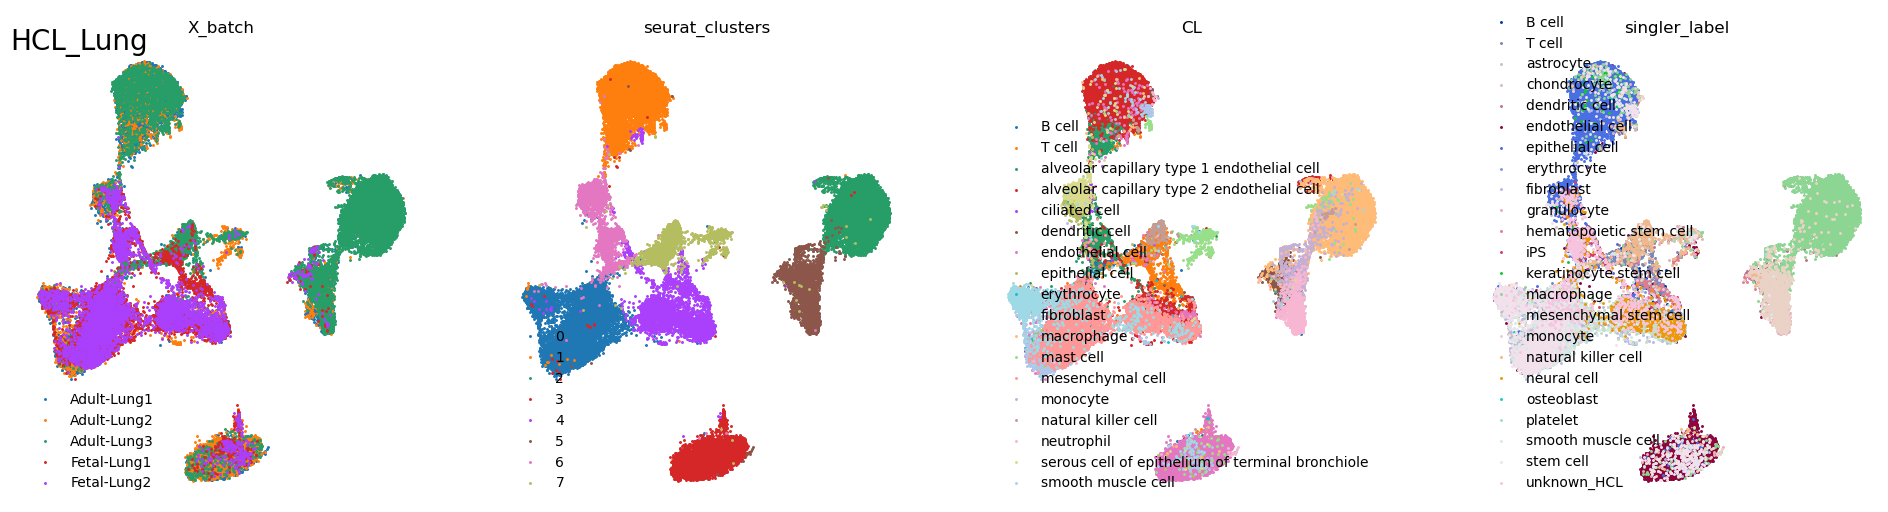

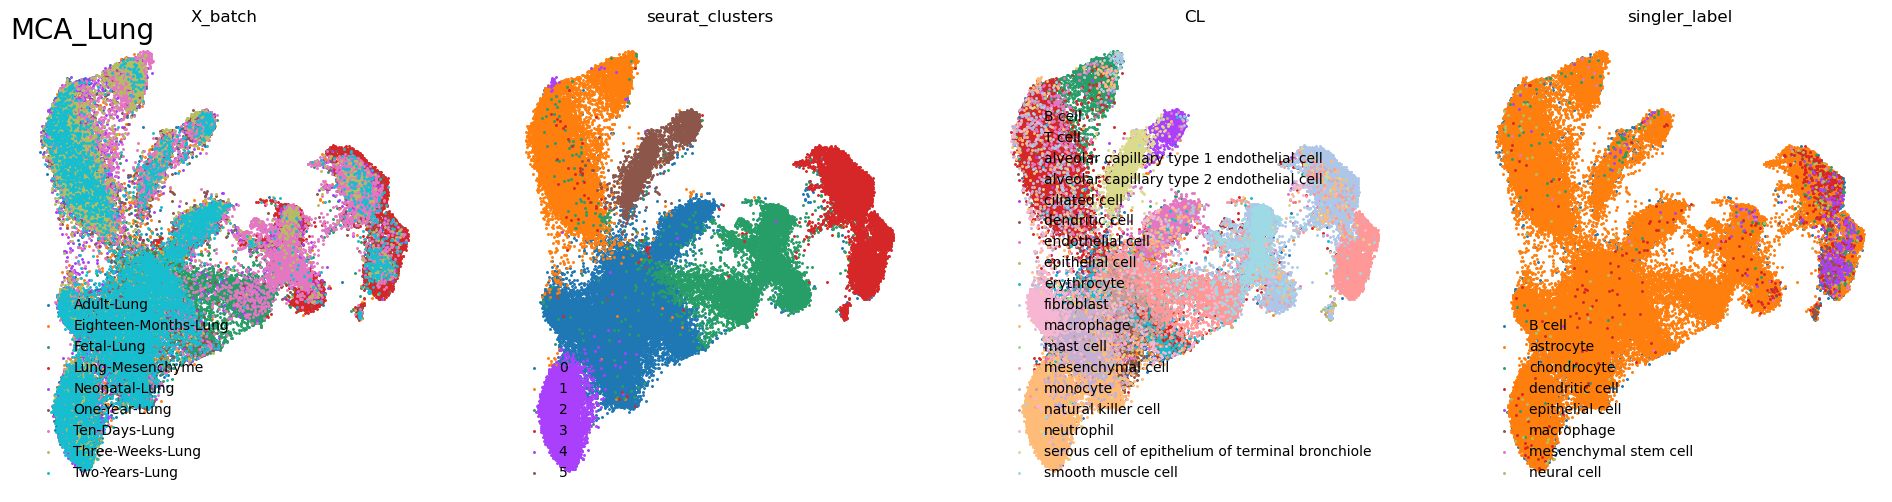

In [6]:
tissue = 'Lung'
db = 'MCA'

keys = 'X_batch,seurat_clusters,CL,singler_label'.split(',')

row = df.loc['{}_{}'.format(db, tissue), :]
update_CL_align(df, tissue, 'CL')
fig = update_CL_plou_umaps(
    update_CL_get_df_obs_and_adata(df.loc['{}_{}'.format('HCL', tissue), :])[1],
    keys=keys, suptitle='{}_{}'.format('HCL', tissue))
fig = update_CL_plou_umaps(
    update_CL_get_df_obs_and_adata(df.loc['{}_{}'.format('MCA', tissue), :])[1],
    keys=keys, suptitle='{}_{}'.format('MCA', tissue))

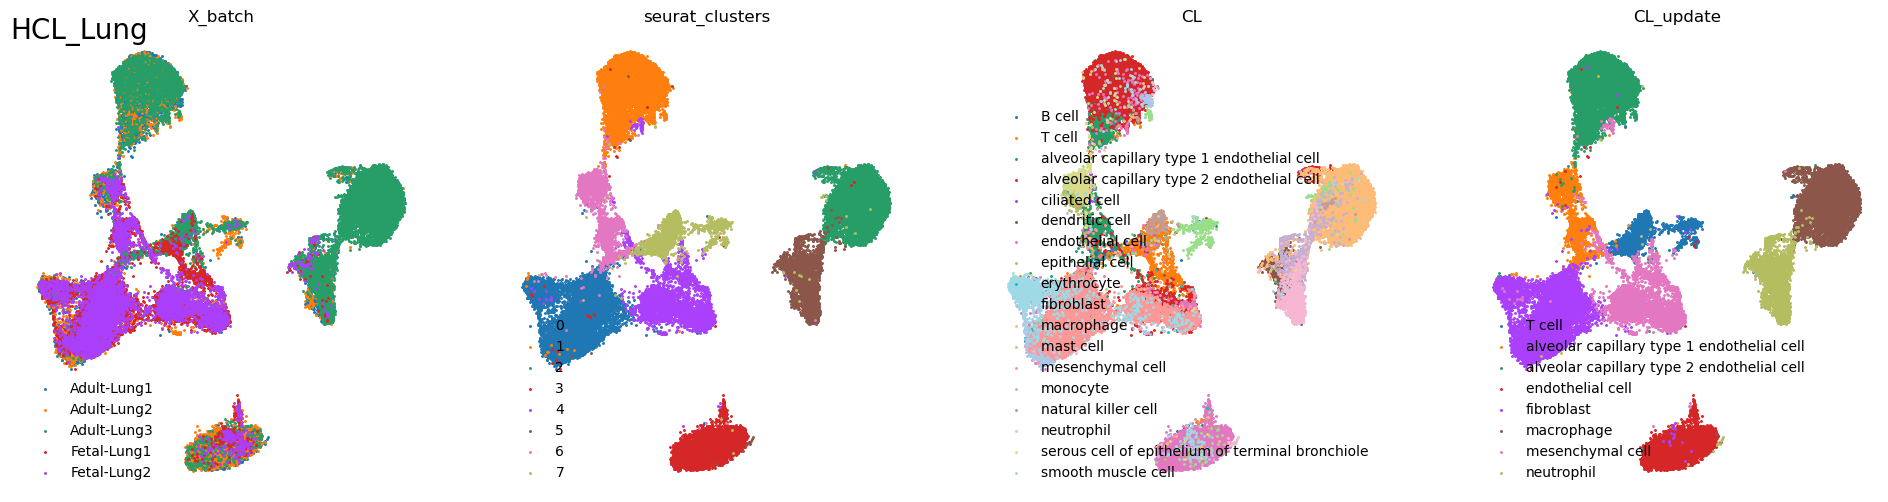

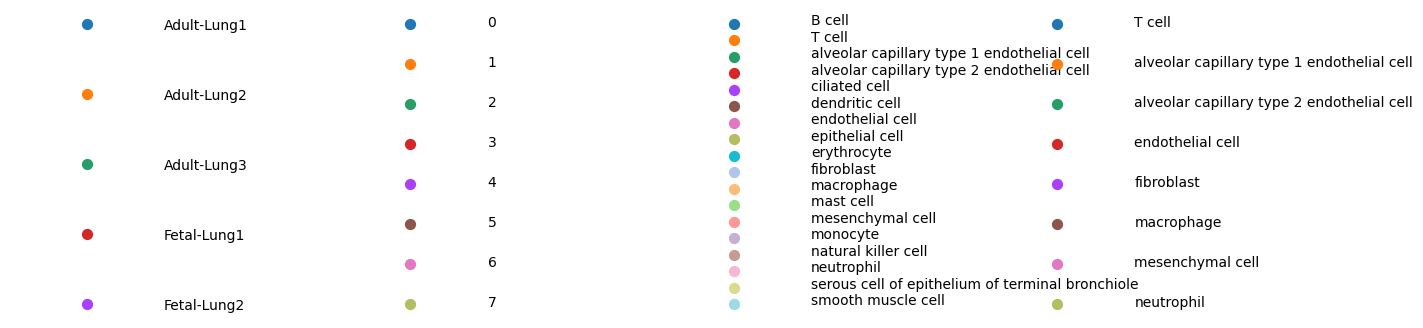

In [7]:
_db = 'MCA' if db == 'HCL' else 'HCL'
df_obs, adata = update_CL_get_df_obs_and_adata(
    df.loc['{}_{}'.format(_db, tissue), :])
if p_seurat_out.joinpath('Map_Seurat_cluster_CL.json').exists():
    Map_Seurat_cluster_CL = loads(
        p_seurat_out.joinpath('Map_Seurat_cluster_CL.json')
        .read_text())
else:
    Map_Seurat_cluster_CL = {}

if '{}_{}'.format(db, tissue) in Map_Seurat_cluster_CL.keys():
    map_cluster = Map_Seurat_cluster_CL['{}_{}'.format(_db, tissue)]
    adata.obs['CL_update'] = adata.obs['seurat_clusters'].map(map_cluster)

if 'CL_update' in adata.obs.columns:
    keys = 'X_batch,seurat_clusters,CL,CL_update'.split(',')

update_CL_plou_umaps(
    adata,
    keys=keys, suptitle='{}_{}'.format(_db, tissue))

fig, axs = plt.subplots(nrows=1, ncols=len(keys), figsize=(4*len(keys), 4))
for ax, k in zip(np.ravel(axs), keys):
    update_CL_show_color_map_adata_key(adata, k, ax=ax)

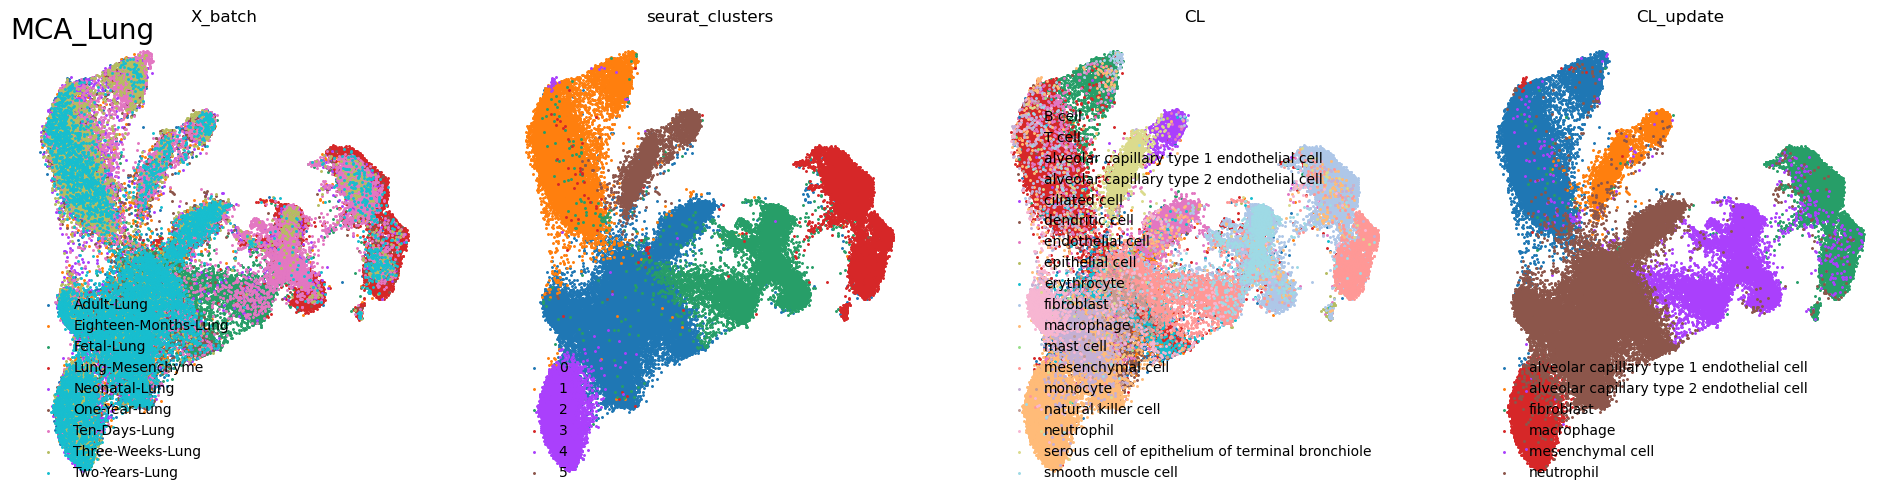

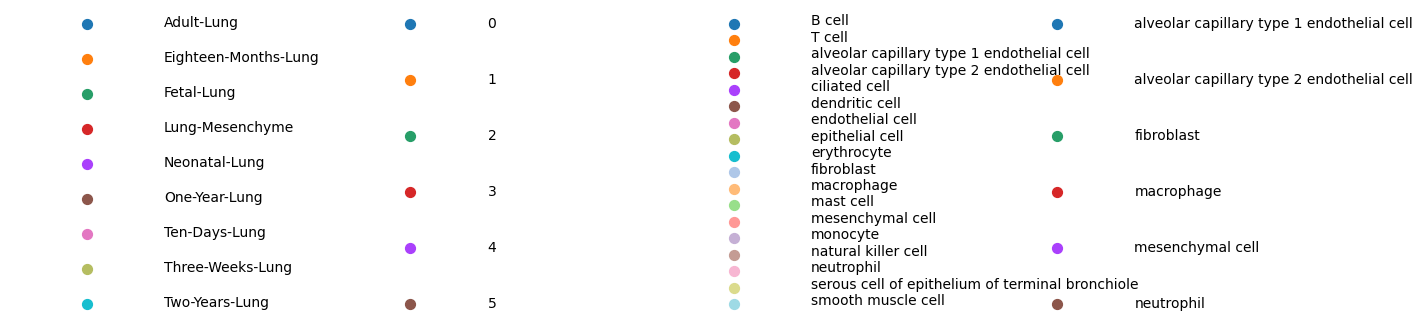

In [8]:
df_obs, adata = update_CL_get_df_obs_and_adata(
    row)
if p_seurat_out.joinpath('Map_Seurat_cluster_CL.json').exists():
    Map_Seurat_cluster_CL = loads(
        p_seurat_out.joinpath('Map_Seurat_cluster_CL.json')
        .read_text())
else:
    Map_Seurat_cluster_CL = {}

if '{db}_{tissue}'.format(**row) in Map_Seurat_cluster_CL.keys():
    map_cluster = Map_Seurat_cluster_CL['{db}_{tissue}'.format(**row)]
    adata.obs['CL_update'] = adata.obs['seurat_clusters'].map(map_cluster)
    update_CL_Map_Seurat_cluster_CL_align(Map_Seurat_cluster_CL, tissue)
else:
    map_cluster = {
        str(_): '' for _ in np.sort(
            adata.obs['seurat_clusters'].astype(
                np.int8).unique())}

if 'CL_update' in adata.obs.columns:
    keys = 'X_batch,seurat_clusters,CL,CL_update'.split(',')

update_CL_plou_umaps(
    adata,
    keys=keys, suptitle='{}_{}'.format(db, tissue))

fig, axs = plt.subplots(nrows=1, ncols=len(keys), figsize=(4*len(keys), 4))
for ax, k in zip(np.ravel(axs), keys):
    update_CL_show_color_map_adata_key(adata, k, ax=ax)

# quer

In [9]:
# marker from HCL or MCA
markers = pd.read_csv(
    p_Markers.joinpath('Markers_{db}_{tissue}.csv'.format(**row)))\
    .query("p_val < 0.05 & avg_diff > 1")\
    .sort_values('name,cluster,avg_diff'.split(','), ascending=False)\
    .loc[:, 'gene,avg_diff,ann,p_val,cluster,name'.split(',')]
# display(markers.head(2))

# marker from Seurat
df_marker = (pd.read_csv(row['Markers'])
             .loc[:, 'cluster,gene,p_val_adj,avg_log2FC'.split(',')]
             .query('p_val_adj<0.05 & avg_log2FC > 1'))
df_marker['cluster'] = df_marker['cluster'].astype(str)
display(df_marker.head(2))


display(map_cluster)
print("|{db}_{tissue}||||".format(**row))

cluster    gene  p_val_adj  avg_log2FC
0       0  Ms4a4c        0.0    3.116078
1       0    Lat2        0.0    3.073830

{'0': 'neutrophil',
 '1': 'alveolar capillary type 1 endothelial cell',
 '2': 'mesenchymal cell',
 '3': 'fibroblast',
 '4': 'macrophage',
 '5': 'alveolar capillary type 2 endothelial cell'}

|MCA_Lung||||


## query cluster

> 存疑/记录


|db_tissue|seurat_clusters|CL_update|note|
|:-:|:-:|:-:|:-:|
|HCL_Bone-Marrow|0|hematopoietic stem cell|CD34P|
|HCL_Bone-Marrow|1|common myeloid progenitor|CD34P|
|HCL_Brain|2|macrophage|Microglia, 神经组织中的巨噬|
|HCL_Brain|4|stem cell||
|MCA_Brain|5|stem cell||
|HCL_Heart|3|myeloid cell|Neu,Mar,DCs|
|HCL_Intestine|4|fibroblast||
|HCL_Kidney|1|mesenchymal cell|Proliferating|
|MCA_Kidney|2|mesenchymal cell|Proliferating|
|HCL_Liver|2|mast cell|FCER1A ,[CellMarker](http://xteam.xbio.top/CellMarker/search.jsp)|
|HCL_Liver|2|erythrocyte|Fetal,HBA1,AHSP,[CellMarker](http://xteam.xbio.top/CellMarker/search.jsp)|
|HCL_Liver|5|macrophage|Kupffer cell, 肝脏中的巨噬|
|MCA_Liver|2|macrophage|Kupffer cell, 肝脏中的巨噬|

In [10]:
display(df_marker.query("cluster == '{}'".format(0)).head(5),
        df_marker.query("cluster == '{}'".format(3)).head(5))

cluster    gene  p_val_adj  avg_log2FC
0       0  Ms4a4c        0.0    3.116078
1       0    Lat2        0.0    3.073830
2       0  S100a4        0.0    3.034687
3       0    Ly86        0.0    3.001566
4       0   Plbd1        0.0    2.982272

cluster     gene  p_val_adj  avg_log2FC
8747       3     Pi16        0.0    5.462721
8748       3  Clec11a        0.0    5.379709
8749       3      Cpz        0.0    5.180619
8750       3   Cxcl14        0.0    4.933390
8751       3      Gsn        0.0    4.928673

In [11]:
cluster = '2'
df_marker_cluste = df_marker.query("cluster == '{}'".format(cluster))
display(df_marker_cluste.head(10))
q_gene_1 = df_marker_cluste.head(1)['gene'].to_numpy()
q_gene_5 = df_marker_cluste.head(5)['gene'].to_numpy()
q_gene_10 = df_marker_cluste.head(20)['gene'].to_numpy()

display(
    markers.query("gene in @q_gene_1").sort_values('avg_diff', ascending=False),
    markers.query("gene in @q_gene_5").sort_values('avg_diff', ascending=False),
    markers.query("gene in @q_gene_10").sort_values('avg_diff', ascending=False),
)
map_cluster.update({
    '0':'neutrophil',
    '1':'alveolar capillary type 1 endothelial cell',
    '2':'mesenchymal cell',
    '3':'fibroblast',
    '4':'macrophage',
    '5':'alveolar capillary type 2 endothelial cell'
})

cluster    gene  p_val_adj  avg_log2FC
4749       2   Tagln        0.0    5.968321
4750       2   Timp4        0.0    5.636521
4751       2   Actg2        0.0    5.533431
4752       2    Cnn1        0.0    5.466529
4753       2   Actc1        0.0    5.126143
4754       2   Acta2        0.0    4.994009
4755       2   Lmod1        0.0    4.957324
4756       2     Des        0.0    4.832933
4757       2   Myh11        0.0    4.739568
4758       2  Mustn1        0.0    4.500391

gene  avg_diff                                                ann  \
22890  Tagln    2.8809                                 Smooth muscle cell   
26797  Tagln    2.6499  Axin2 positive myofibrogenic progenitor cell_A...   
15633  Tagln    2.4680                              Fibroblast_Acta2 high   
20757  Tagln    2.4283                                 Smooth muscle cell   
3574   Tagln    2.3674                      Smooth muscle cell_Actg2 high   
9508   Tagln    2.3134                                 Smooth muscle cell   
3705   Tagln    1.9171                     Smooth muscle cell_Cxcl12 high   
7662   Tagln    1.6181                                 Smooth muscle cell   
5663   Tagln    1.3734                                      Myofibroblast   

               p_val                  cluster                  name  
22890  2.444800e-282  Eighteen-Months-Lung_17  Eighteen-Months-Lung  
26797   0.000000e+00        Lung-Mesenchyme_2       Lung-Mesenchyme  
15633   0.000000e+00            Adult-Lung_23            Adult-Lung  
20757   0.000000e+00         One-Year-Lung_20         One-Year-Lung  
3574   4.414300e-174         Neonatal-Lung_11         Neonatal-Lung  
9508    0.000000e+00      Three-Weeks-Lung_11      Three-Weeks-Lung  
3705   4.147900e-141         Neonatal-Lung_12         Neonatal-Lung  
7662    3.435400e-81         Ten-Days-Lung_17         Ten-Days-Lung  
5663   7.818500e-244          Ten-Days-Lung_2         Ten-Days-Lung

gene  avg_diff                                                ann  \
26793   Cnn1    2.9724  Axin2 positive myofibrogenic progenitor cell_A...   
7655   Actc1    2.9498                                 Smooth muscle cell   
3570   Actg2    2.9104                      Smooth muscle cell_Actg2 high   
22890  Tagln    2.8809                                 Smooth muscle cell   
15629  Actc1    2.8147                              Fibroblast_Acta2 high   
26794  Actg2    2.7344  Axin2 positive myofibrogenic progenitor cell_A...   
26795  Actc1    2.7089  Axin2 positive myofibrogenic progenitor cell_A...   
26797  Tagln    2.6499  Axin2 positive myofibrogenic progenitor cell_A...   
223    Actg2    2.5435                                 Smooth muscle cell   
15633  Tagln    2.4680                              Fibroblast_Acta2 high   
20757  Tagln    2.4283                                 Smooth muscle cell   
15636  Actg2    2.3817                              Fibroblast_Acta2 high   
3574   Tagln    2.3674                      Smooth muscle cell_Actg2 high   
9507   Actc1    2.3583                                 Smooth muscle cell   
26490  Actc1    2.3365                     Cardiac muscle progenitor cell   
9508   Tagln    2.3134                                 Smooth muscle cell   
9509   Actg2    2.2802                                 Smooth muscle cell   
15639   Cnn1    2.2718                              Fibroblast_Acta2 high   
22894  Actc1    2.2449                                 Smooth muscle cell   
26801  Timp4    2.1911  Axin2 positive myofibrogenic progenitor cell_A...   
3695   Timp4    2.1791                     Smooth muscle cell_Cxcl12 high   
9510    Cnn1    2.1706                                 Smooth muscle cell   
7659   Actg2    2.1430                                 Smooth muscle cell   
7660    Cnn1    1.9871                                 Smooth muscle cell   
22897   Cnn1    1.9462                                 Smooth muscle cell   
3705   Tagln    1.9171                     Smooth muscle cell_Cxcl12 high   
7662   Tagln    1.6181                                 Smooth muscle cell   
229     Cnn1    1.5952                                 Smooth muscle cell   
3716   Actg2    1.3811                     Smooth muscle cell_Cxcl12 high   
5663   Tagln    1.3734                                      Myofibroblast   
5664   Actg2    1.3079                                      Myofibroblast   

               p_val                  cluster                  name  
26793   0.000000e+00        Lung-Mesenchyme_2       Lung-Mesenchyme  
7655    0.000000e+00         Ten-Days-Lung_17         Ten-Days-Lung  
3570   1.447200e-283         Neonatal-Lung_11         Neonatal-Lung  
22890  2.444800e-282  Eighteen-Months-Lung_17  Eighteen-Months-Lung  
15629  1.886400e-159            Adult-Lung_23            Adult-Lung  
26794   0.000000e+00        Lung-Mesenchyme_2       Lung-Mesenchyme  
26795   0.000000e+00        Lung-Mesenchyme_2       Lung-Mesenchyme  
26797   0.000000e+00        Lung-Mesenchyme_2       Lung-Mesenchyme  
223     0.000000e+00             Fetal-Lung_4            Fetal-Lung  
15633   0.000000e+00            Adult-Lung_23            Adult-Lung  
20757   0.000000e+00         One-Year-Lung_20         One-Year-Lung  
15636   0.000000e+00            Adult-Lung_23            Adult-Lung  
3574   4.414300e-174         Neonatal-Lung_11         Neonatal-Lung  
9507   5.906900e-147      Three-Weeks-Lung_11      Three-Weeks-Lung  
26490   6.394400e-40        Lung-Mesenchyme_1       Lung-Mesenchyme  
9508    0.000000e+00      Three-Weeks-Lung_11      Three-Weeks-Lung  
9509   1.161100e-209      Three-Weeks-Lung_11      Three-Weeks-Lung  
15639  1.796200e-147            Adult-Lung_23            Adult-Lung  
22894   9.745500e-96  Eighteen-Months-Lung_17  Eighteen-Months-Lung  
26801   0.000000e+00        Lung-Mesenchyme_2       Lung-Mesenchyme  
3695    0.000000e+00         Neonatal-Lung_12         Neonatal-Lung  
951

gene  avg_diff                                                ann  \
15625   Acta2    4.0837                              Fibroblast_Acta2 high   
20754   Acta2    3.8990                                 Smooth muscle cell   
9503    Myh11    3.5059                                 Smooth muscle cell   
22889   Acta2    3.3064                                 Smooth muscle cell   
9504    Acta2    3.1963                                 Smooth muscle cell   
...       ...       ...                                                ...   
5441     Myl9    1.0880                                           Myoblast   
28052  Mustn1    1.0804                             Stromal cell_Aspn high   
235      Tpm2    1.0709                                 Smooth muscle cell   
27138     Des    1.0179  Axin2 positive myofibrogenic progenitor cell_C...   
6616   Pdlim3    1.0142                                 Proliferating cell   

               p_val                  cluster                  name  
15625  2.746800e-260            Adult-Lung_23            Adult-Lung  
20754  7.987100e-275         One-Year-Lung_20         One-Year-Lung  
9503    0.000000e+00      Three-Weeks-Lung_11      Three-Weeks-Lung  
22889   1.467900e-87  Eighteen-Months-Lung_17  Eighteen-Months-Lung  
9504   1.021300e-219      Three-Weeks-Lung_11      Three-Weeks-Lung  
...              ...                      ...                   ...  
5441    1.613600e-09         Neonatal-Lung_20         Neonatal-Lung  
28052  3.938500e-207        Lung-Mesenchyme_7       Lung-Mesenchyme  
235     6.844100e-55             Fetal-Lung_4            Fetal-Lung  
27138   1.413700e-38        Lung-Mesenchyme_3       Lung-Mesenchyme  
6616    6.298300e-69          Ten-Days-Lung_9         Ten-Days-Lung  

[116 rows x 6 columns]

## query CL

In [12]:
_ = pd.read_csv(p_root.joinpath('run/3-1_202311160955.csv')).query(
    "ann == '{}'".format('mesenchymal cell')
).query("tissue == '{}'".format(tissue))
display(_)
print(*_['CL'], sep='\n')

Empty DataFrame
Columns: [index, db, name, tissue, ann, ann_simplify, CL, translate]
Index: []

## plot CL_update

In [13]:
map_cluster

{'0': 'neutrophil',
 '1': 'alveolar capillary type 1 endothelial cell',
 '2': 'mesenchymal cell',
 '3': 'fibroblast',
 '4': 'macrophage',
 '5': 'alveolar capillary type 2 endothelial cell'}

{'0': 'neutrophil',
 '1': 'alveolar capillary type 1 endothelial cell',
 '2': 'mesenchymal cell',
 '3': 'fibroblast',
 '4': 'macrophage',
 '5': 'alveolar capillary type 2 endothelial cell'}

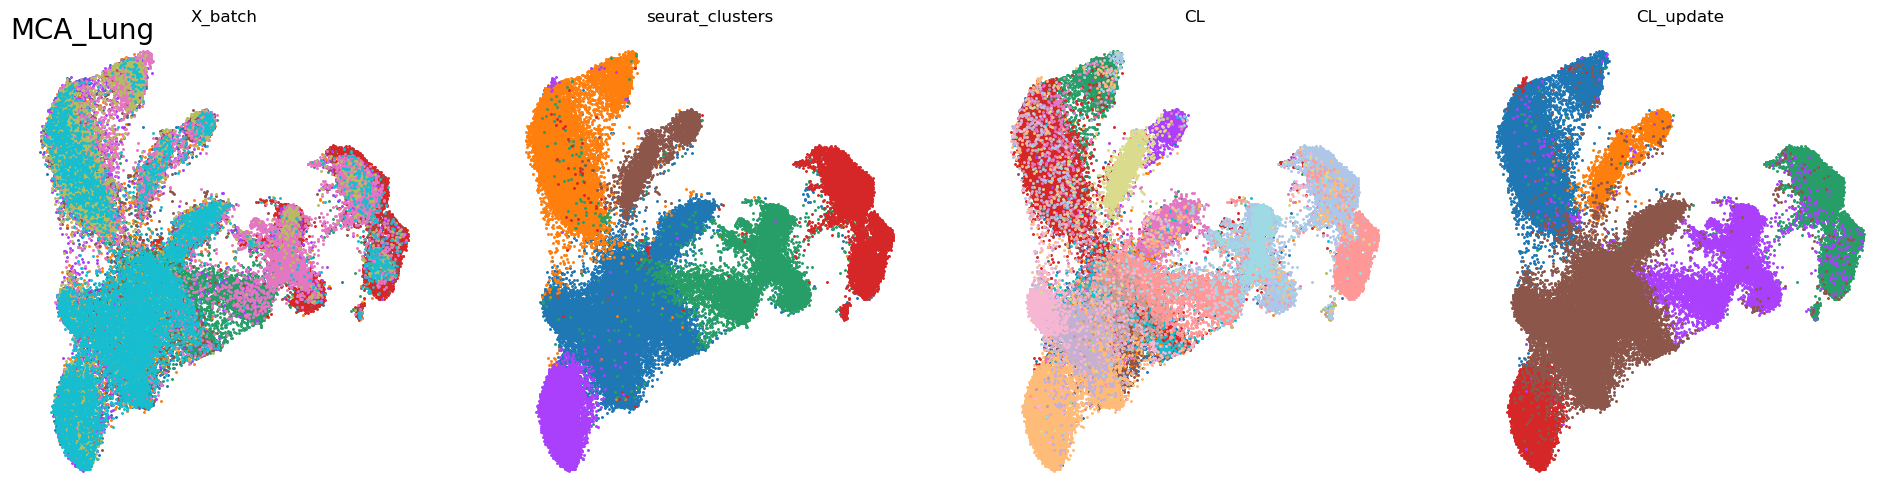

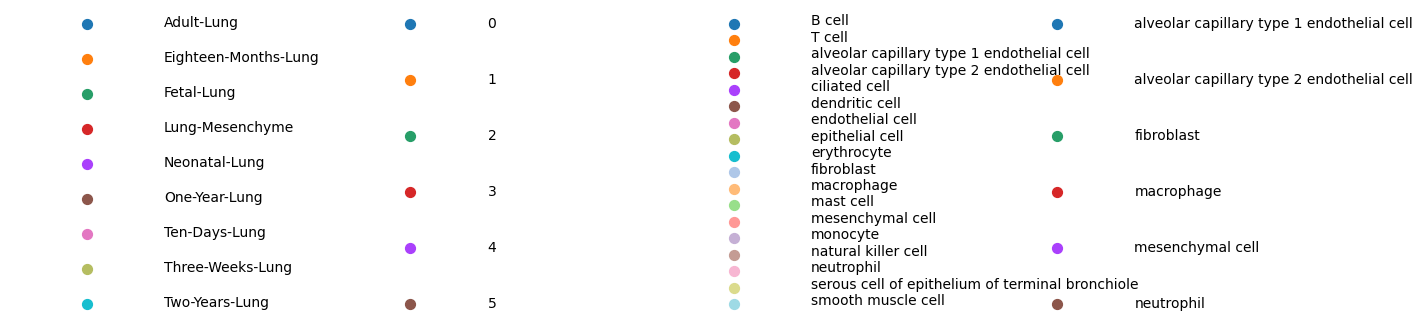

In [14]:
keys = 'X_batch,seurat_clusters,CL,CL_update'.split(',')
display(map_cluster)
adata.obs['CL_update'] = adata.obs['seurat_clusters'].map(map_cluster)
fig = update_CL_plou_umaps(
    adata,
    keys='X_batch,seurat_clusters,CL,CL_update'.split(','),
    suptitle='{db}_{tissue}'.format(**row),
    show_legend=False)
fig, axs = plt.subplots(nrows=1, ncols=len(keys), figsize=(4*len(keys), 4))
for ax, k in zip(np.ravel(axs), keys):
    update_CL_show_color_map_adata_key(adata, k, ax=ax)

CL
fibroblast          10695
endothelial cell     4840
Name: count, dtype: int64

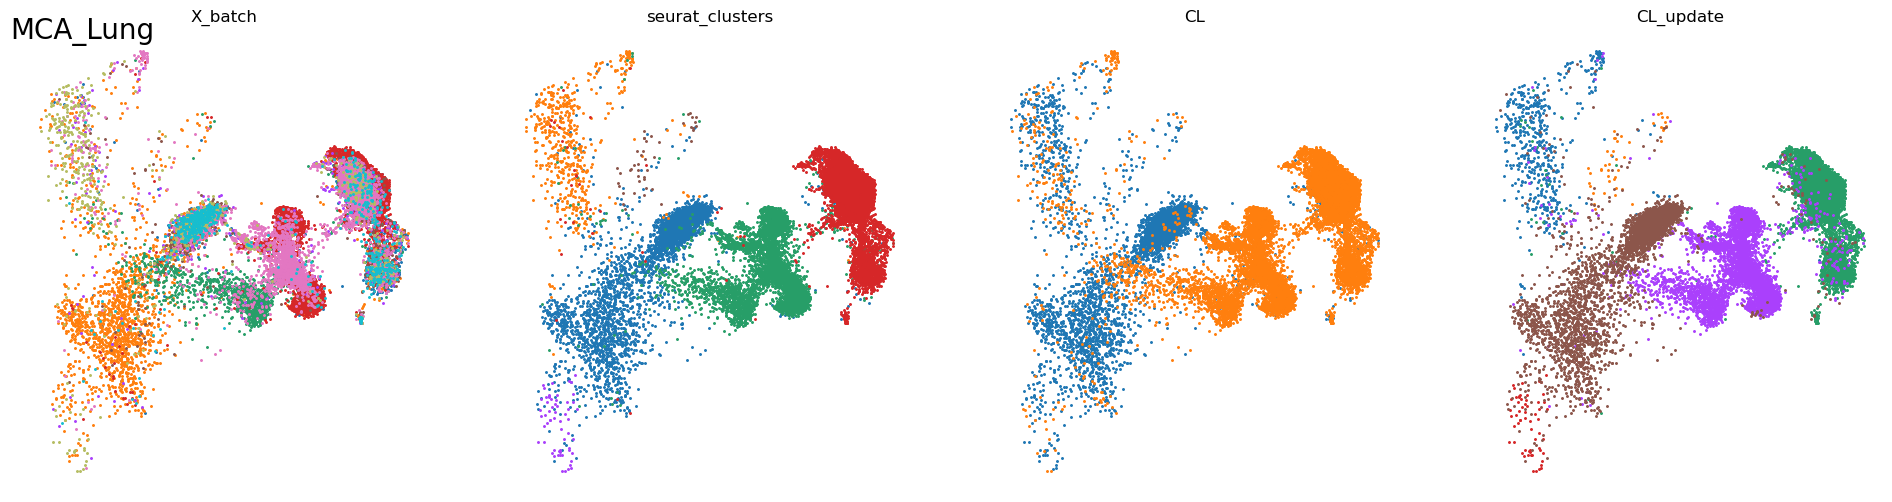

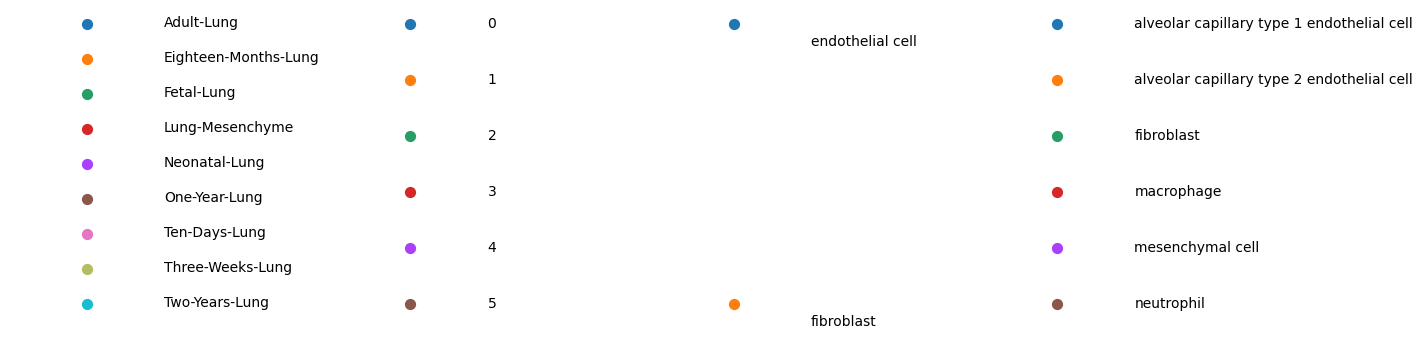

In [15]:
# key = 'seurat_clusters'
# values = ['2']
key = 'CL'
values = ['fibroblast', 'endothelial cell']

_adata = update_CL_subset_adata(adata, key, values)
fig = update_CL_plou_umaps(
    _adata,
    keys='X_batch,seurat_clusters,CL,CL_update'.split(','),
    suptitle='{db}_{tissue}'.format(**row),
    show_legend=False)
fig, axs = plt.subplots(nrows=1, ncols=len(keys), figsize=(4*len(keys), 4))
for ax, k in zip(np.ravel(axs), keys):
    update_CL_show_color_map_adata_key(
        _adata, k, ax=ax)
display(
    _adata.obs['CL'].value_counts())

# Map_Seurat_cluster_CL

为防止误修改被保存到文件中，使用硬编码

In [16]:
print("""
'{db}_{tissue}':{{
    k:v for k,v in zip(
        '{}'.split(','),
        '{}'.split(','),
    )}},
""".format(
    ','.join(map_cluster.keys()),
    ','.join(map_cluster.values()),
    **row
))


'MCA_Lung':{
    k:v for k,v in zip(
        '0,1,2,3,4,5'.split(','),
        'neutrophil,alveolar capillary type 1 endothelial cell,mesenchymal cell,fibroblast,macrophage,alveolar capillary type 2 endothelial cell'.split(','),
    )},



In [17]:
# A B
Map_Seurat_cluster_CL = {
    'HCL_Adrenal-Gland': {k: v for k,
                          v in zip('0,1,2,3,4,5,6'.split(','),
                                   'cortical cell of adrenal gland,neutrophil,fibroblast,endothelial cell,epithelial cell,T cell,chromaffin cell'.split(
                                       ','),
                                   )},
    'MCA_Adrenal-Gland': {k: v for k,
                          v in zip('0,1,2,3,4,5,6'.split(','),
                                   'cortical cell of adrenal gland,macrophage,endothelial cell,cortical cell of adrenal gland,dendritic cell,fibroblast,chromaffin cell'.split(
                                       ','),
                                   )},
    'HCL_Bone-Marrow': {k: v for k,
                        v in zip('0,1,2,3,4,5,6,7,8'.split(','),
                                 'hematopoietic stem cell,common myeloid progenitor,neutrophil,neutrophil,erythrocyte,macrophage,neutrophil,B cell,B cell'.split(
                                     ','),
                                 )},
    'MCA_Bone-Marrow': {k: v for k,
                        v in zip('0,1,2,3,4,5,6,7'.split(','),
                                 'neutrophil,neutrophil,eosinophil,erythrocyte,fibroblast,macrophage,fibroblast,basophil'.split(
                                     ','),
                                 )},
    'HCL_Brain': {
        k: v for k, v in zip(
            '0,1,2,3,4,5,6,7'.split(','),
            'neural cell,oligodendrocyte,macrophage,astrocyte,stem cell,fibroblast,granule cell,endothelial cell'.split(
                ','),
        )},
    'MCA_Brain': {
        k: v for k, v in zip(
            '0,1,10,2,3,4,5,6,7,8,9'.split(','),
            'neural cell,T cell,ciliated cell,neural cell,macrophage,oligodendrocyte,stem cell,ciliated cell,endothelial cell,oligodendrocyte,neutrophil'.split(
                ','),
        )},
}

# H
Map_Seurat_cluster_CL.update({

    'HCL_Heart': {
        k: v for k, v in zip(
            '0,1,2,3,4,5,6'.split(','),
            'cardiac muscle cell,cardiac muscle cell,mesenchymal cell,myeloid cell,mesenchymal cell,epithelial cell,mesenchymal cell'.split(
                ','),
        )},
    # 'HCL_Heart': { #version =0.0.1 hm 66.18%
    #     k: v for k, v in zip(
    #         '0,1,2,3,4,5,6'.split(','),
    #         'cardiac muscle cell,cardiac muscle cell,smooth muscle cell,myeloid cell,endothelial cell,endocardial cell,fibroblast'.split(
    #             ','),
    #     )},
    'MCA_Heart': {
        k: v for k, v in zip(
            '0,1,2,3,4,5,6,7'.split(','),
            'mesenchymal cell,mesenchymal cell,myeloid cell,T cell,epithelial cell,mesenchymal cell,cardiac muscle cell,myeloid cell'.split(','),
        )},
    # 'MCA_Heart': {  # version =0.0.1 mh 32.16%
    #     k: v for k, v in zip(
    #         '0,1,2,3,4,5,6,7'.split(','),
    #         'fibroblast,endothelial cell,myeloid cell,T cell,epithelial cell,smooth muscle cell,cardiac muscle cell,myeloid cell'.split(
    #             ','),
    #     )},

})
# I
Map_Seurat_cluster_CL.update({
    # 'HCL_Intestine': {  # version =0.0.1 mh 63.05%
    #     k: v for k, v in zip(
    #         '0,1,2,3,4,5,6'.split(','),
    #         'enterocyte,B cell,macrophage,stromal cell,fibroblast,goblet cell,endothelial cell'.split(
    #             ','),
    # )},
    'HCL_Intestine': {  # version =0.0.1 mh 63.05%
        k: v for k, v in zip(
            '0,1,2,3,4,5,6'.split(','),
            'enterocyte,B cell,macrophage,stromal cell,fibroblast,enterocyte,endothelial cell'.split(
                ','),
        )},
    # 'MCA_Intestine': {  # version =0.0.1 hm 82.35%
    #     k: v for k, v in zip(
    #         '0,1,2,3,4,5,6,7'.split(','),
    #         'enterocyte,enterocyte,B cell,goblet cell,macrophage,enteroendocrine cell,epithelial cell,tuft cell of colon'.split(
    #             ','),
    'MCA_Intestine': {  # version =0.0.1 hm 82.35%
        k: v for k, v in zip(
            '0,1,2,3,4,5,6,7'.split(','),
            'enterocyte,enterocyte,B cell,enterocyte,macrophage,enteroendocrine cell,epithelial cell,tuft cell of colon'.split(
                ','),
        )},


})
# K
Map_Seurat_cluster_CL.update({

    'HCL_Kidney': {
        k: v for k, v in zip(
            '0,1,2,3,4,5,6,7,8'.split(','),
            'mesenchymal cell,mesenchymal cell,kidney tubule cell,endothelial cell,pancreatic ductal cell,myeloid cell,mesenchymal cell,podocyte,epithelial cell'.split(
                ','),
        )},
    # 'HCL_Kidney': {  # version =0.0.1 hm 59.91%
    #     k: v for k, v in zip(
    #         '0,1,2,3,4,5,6,7,8'.split(','),
    #         'kidney loop of Henle thin descending limb epithelial cell,mesenchymal cell,kidney tubule cell,endothelial cell,pancreatic ductal cell,myeloid cell,fibroblast,podocyte,epithelial cell'.split(
    #             ','),
    #     )},
    'MCA_Kidney': {
        k: v for k, v in zip(
            '0,1,2,3,4,5,6,7,8'.split(','),
            'kidney loop of Henle ascending limb epithelial cell,kidney tubule cell,mesenchymal cell,pancreatic ductal cell,myeloid cell,endothelial cell,mesenchymal cell,mesenchymal cell,epithelial cell'.split(','),
        )},
    # 'MCA_Kidney': {# version =0.0.1 mh 72.40%
    #     k: v for k, v in zip(
    #         '0,1,2,3,4,5,6,7,8'.split(','),
    #         'kidney loop of Henle ascending limb epithelial cell,kidney tubule cell,mesenchymal cell,pancreatic ductal cell,myeloid cell,endothelial cell,fibroblast,kidney loop of Henle thin descending limb epithelial cell,epithelial cell'.split(
    #             ','),
    #     )},
})
# L
Map_Seurat_cluster_CL.update({
    'HCL_Liver': {
        k: v for k, v in zip(
            '0,1,2,3,4,5,6,7,8,9'.split(','),
            'erythrocyte,erythrocyte,mast cell,erythrocyte,hepatocyte,macrophage,neutrophil,epithelial cell,hepatocyte,stem cell'.split(
                ','),
        )},
    'MCA_Liver': {  # version =0.0.1 mh 59.91% version =0.0.2 mh 54.08%
        k: v for k, v in zip(
            '0,1,2,3,4,5,6,7,8'.split(','),
            'endothelial cell,neutrophil,macrophage,B cell,dendritic cell,erythrocyte,hepatocyte,fibroblast,hepatocyte'.split(
                ','),
        )},
    'HCL_Lung':{
    k:v for k,v in zip(
        '0,1,2,3,4,5,6,7'.split(','),
        'fibroblast,alveolar capillary type 2 endothelial cell,macrophage,endothelial cell,mesenchymal cell,neutrophil,alveolar capillary type 1 endothelial cell,T cell'.split(','),
    )},
    'MCA_Lung':{
    k:v for k,v in zip(
        '0,1,2,3,4,5'.split(','),
        'neutrophil,alveolar capillary type 1 endothelial cell,mesenchymal cell,fibroblast,macrophage,alveolar capillary type 2 endothelial cell'.split(','),
    )},

})
# S
Map_Seurat_cluster_CL.update({
    'MCA_Spleen': {
        k: v for k, v in zip(
            '0,1,2,3,4,5,6,7'.split(','),
            'T cell,erythrocyte,B cell,plasma cell,macrophage,neutrophil,erythrocyte,macrophage'.split(','),
        )},
    'HCL_Spleen': {
        k: v for k, v in zip(
            '0,1,2,3,4,5,6,7'.split(','),
            'B cell,B cell,T cell,neutrophil,endothelial cell,macrophage,erythrocyte,macrophage'.split(','),
        )},
})

update_CL_Map_Seurat_cluster_CL_align(Map_Seurat_cluster_CL, tissue)

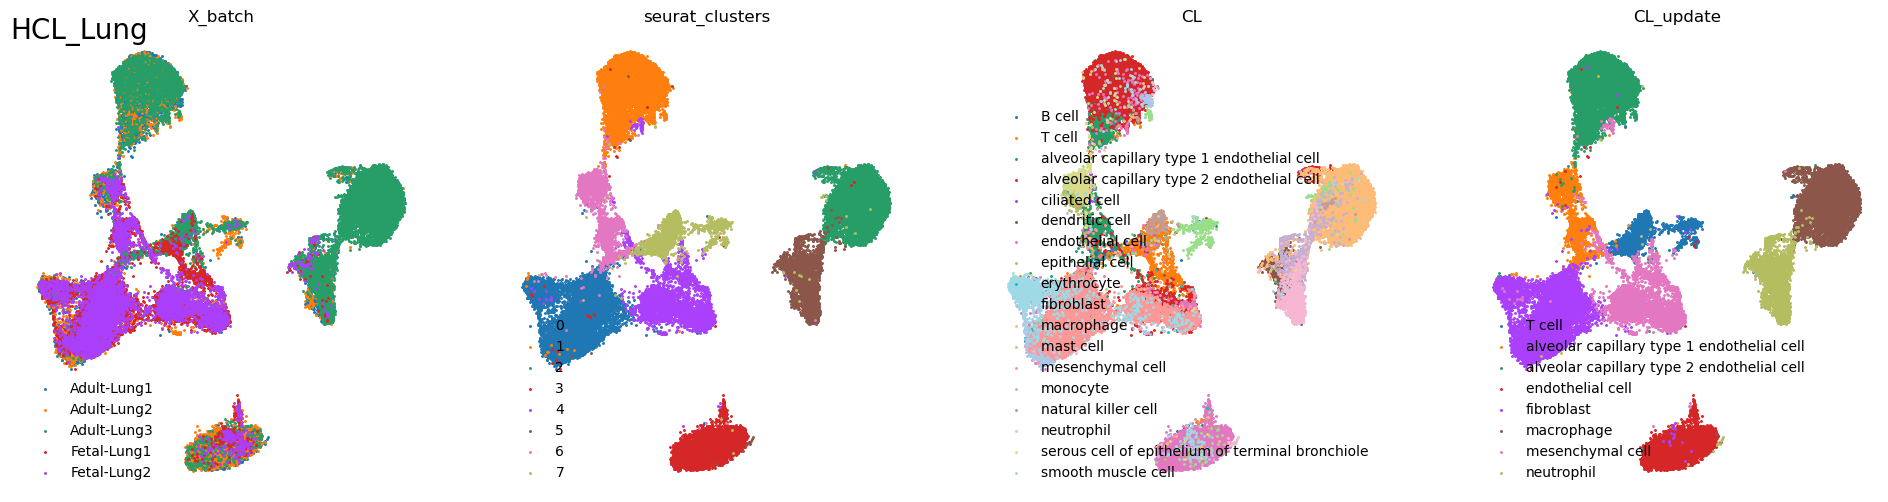

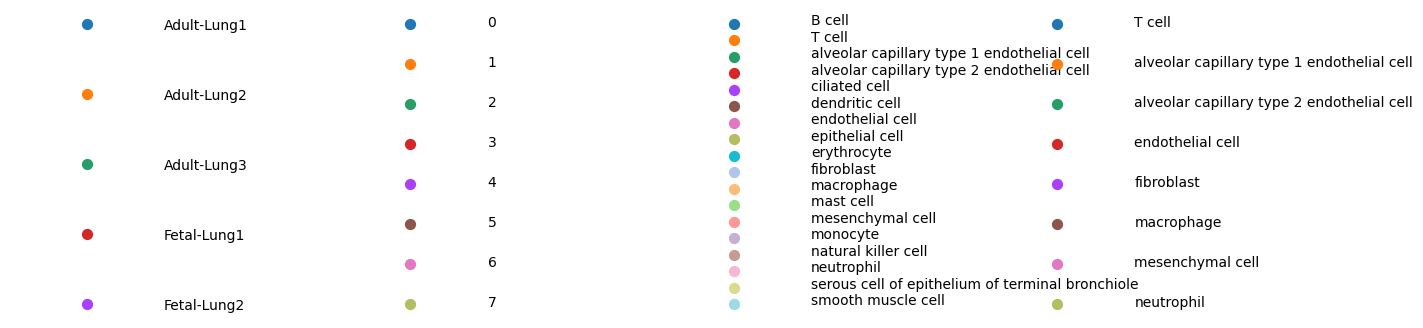

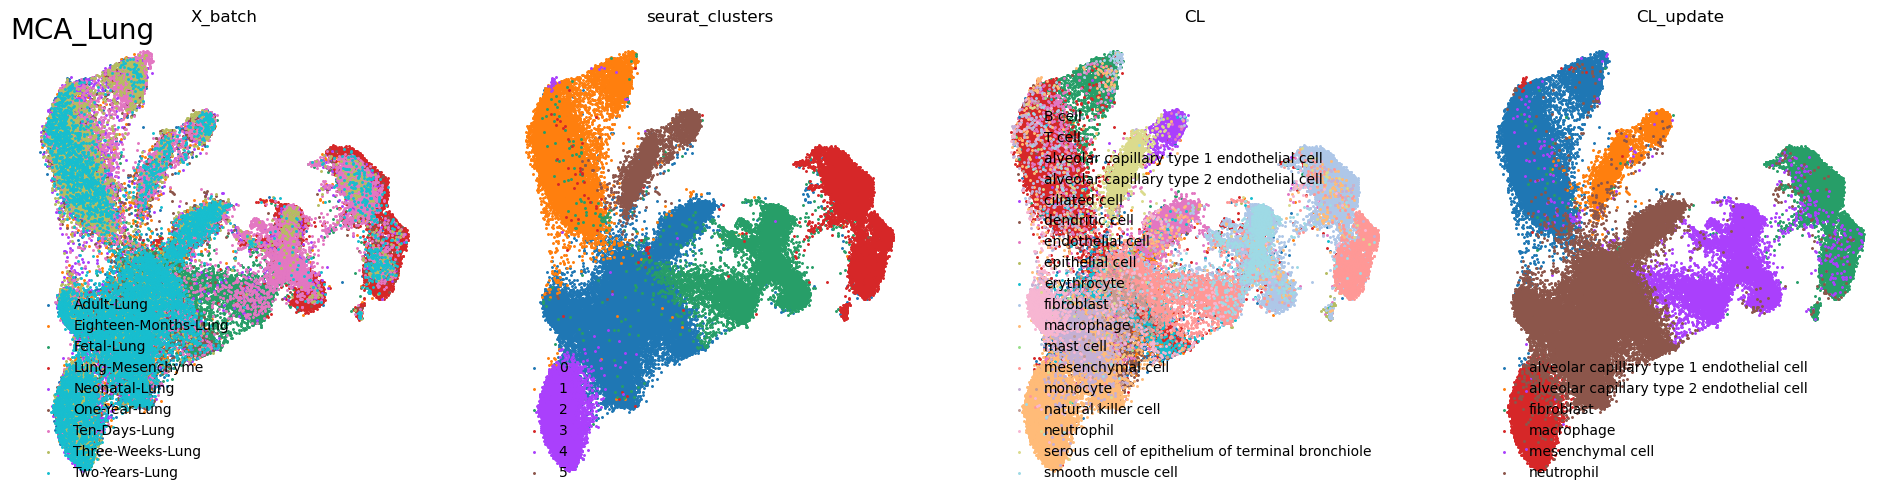

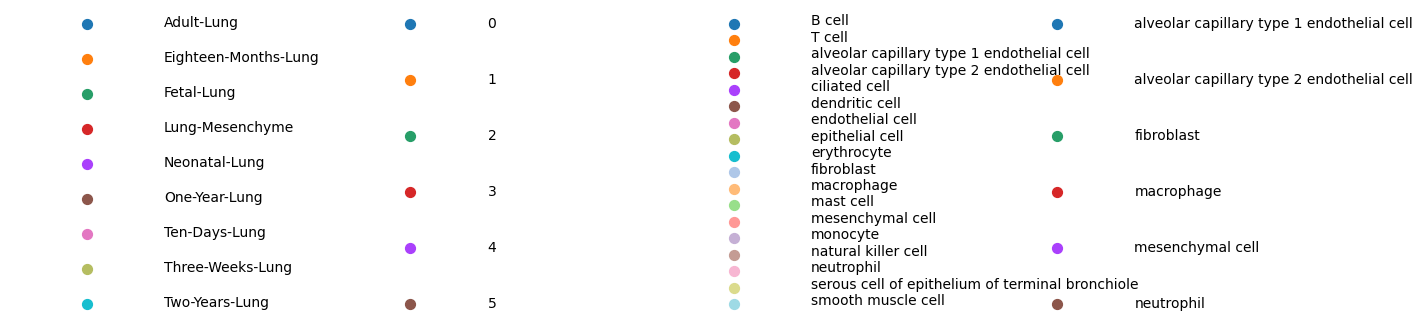

In [18]:
df_obs, adata = update_CL_get_df_obs_and_adata(
    df.loc['{}_{}'.format('HCL', tissue), :])
if '{}_{}'.format(db, tissue) in Map_Seurat_cluster_CL.keys():
    map_cluster = Map_Seurat_cluster_CL['{}_{}'.format('HCL', tissue)]
    adata.obs['CL_update'] = adata.obs['seurat_clusters'].map(map_cluster)
    # update_CL_Map_Seurat_cluster_CL_align(Map_Seurat_cluster_CL, tissue)
else:
    map_cluster = {_: '' for _ in np.sort(df_marker['cluster'].unique())}


if 'CL_update' in adata.obs.columns:
    keys = 'X_batch,seurat_clusters,CL,CL_update'.split(',')

update_CL_plou_umaps(
    adata,
    keys=keys, suptitle='{}_{}'.format('HCL', tissue))
# update_CL_show_color_map_adata_key(adata, 'seurat_clusters')
# update_CL_show_color_map_adata_key(adata, 'CL')
fig, axs = plt.subplots(nrows=1, ncols=len(keys), figsize=(4*len(keys), 4))
for ax, k in zip(np.ravel(axs), keys):
    update_CL_show_color_map_adata_key(adata, k, ax=ax)


df_obs, adata = update_CL_get_df_obs_and_adata(
    df.loc['{}_{}'.format('MCA', tissue), :])

if '{}_{}'.format(db, tissue) in Map_Seurat_cluster_CL.keys():
    map_cluster = Map_Seurat_cluster_CL['{}_{}'.format('MCA', tissue)]
    adata.obs['CL_update'] = adata.obs['seurat_clusters'].map(map_cluster)
    # update_CL_Map_Seurat_cluster_CL_align(Map_Seurat_cluster_CL, tissue)
else:
    map_cluster = {_: '' for _ in np.sort(df_marker['cluster'].unique())}


if 'CL_update' in adata.obs.columns:
    keys = 'X_batch,seurat_clusters,CL,CL_update'.split(',')

update_CL_plou_umaps(
    adata,
    keys=keys, suptitle='{}_{}'.format('MCA', tissue))
# update_CL_show_color_map_adata_key(adata, 'seurat_clusters')
# update_CL_show_color_map_adata_key(adata, 'CL')
fig, axs = plt.subplots(nrows=1, ncols=len(keys), figsize=(4*len(keys), 4))
for ax, k in zip(np.ravel(axs), keys):
    update_CL_show_color_map_adata_key(adata, k, ax=ax)

## save Map_Seurat_cluster_CL

In [19]:
p_seurat_out.joinpath(
    'Map_Seurat_cluster_CL.json'
).write_text(dumps(Map_Seurat_cluster_CL))
print('[out] {}'.format(p_seurat_out.joinpath('Map_Seurat_cluster_CL.json')))
print(*np.sort(list(Map_Seurat_cluster_CL.keys())), sep='\n')

[out] /public/workspace/licanchengup/link/res_publish/run/cache/healthy/Seurat_HCL_MCA/Map_Seurat_cluster_CL.json
HCL_Adrenal-Gland
HCL_Bone-Marrow
HCL_Brain
HCL_Heart
HCL_Intestine
HCL_Kidney
HCL_Liver
HCL_Lung
HCL_Spleen
MCA_Adrenal-Gland
MCA_Bone-Marrow
MCA_Brain
MCA_Heart
MCA_Intestine
MCA_Kidney
MCA_Liver
MCA_Lung
MCA_Spleen


In [20]:
print("\n[finish]\n".center(100, "-"))

---------------------------------------------
[finish]
---------------------------------------------


# Update obs CL

In [22]:
def _update_obs_CL(_update_db_tissue):
    _update_obs = pd.read_csv(
        p_cache.joinpath('healthy/{}/obs.csv'.format(_update_db_tissue)), index_col=0
    ).loc[:, '_batch,pre_celltype'.split(',')]
    # display(_update_obs.head(2))
    _update_seurat_obs = pd.read_csv(p_seurat_out.joinpath(
        'obs_{}.csv'.format(_update_db_tissue)), index_col=0)\
        .loc[:, 'seurat_clusters,UMAP1,UMAP2'.split(',')]
    _update_seurat_obs['seurat_clusters'] = _update_seurat_obs['seurat_clusters'].astype(
        str)
    _update_seurat_obs['CL'] = _update_seurat_obs['seurat_clusters'].map(
        _update_Map_Seurat_cluster_CL[_update_db_tissue]
    )
    _update_obs = _update_obs.join(_update_seurat_obs)
    assert _update_obs['CL'].notna().all(), '[Error] has Nan'
    # display(_update_obs.head(2))
    _update_obs.to_csv(
        p_cache.joinpath(
            'healthy/{}/obs.csv'.format(_update_db_tissue)),
        index=True)


_update = False
if _update:
    _update_Map_Seurat_cluster_CL = loads(
        p_seurat_out.joinpath('Map_Seurat_cluster_CL.json').read_text())
    for i, (_update_db_tissue) in enumerate(
            _update_Map_Seurat_cluster_CL.keys()):
        print(
            '\r{} {}'.format(
                i, _update_db_tissue).ljust(
                75, '-'), end='')
        _update_obs_CL(_update_db_tissue)
    print('')
    print("\n[finish]Update obs CL\n".center(100, "-"))

17 HCL_Spleen-------------------------------------------------------------
--------------------------------------
[finish]Update obs CL
---------------------------------------
